###**Abalone Dataset**

The Abalone dataset includes data regarding the physical characteristics of abalone, a kind of sea mollusc.

A few of the attributes include, sex, length, diametr, height etc..

The target variable are the **rings** as its an attribute that can be used to predict the age if the abalone because it correlates with the number of rings on the shell.


Project Objective

 Predicting Abalone Age for Improved Understanding and Management

Scope

By using machine learning techniques, the study seeks to determine an abalone's age from physical parameters.

 This study aims to provide useful insights into abalone growth patterns through the use of prediction models, which might help with abalone management & perhaps eliminate the need for intrusive and time-consuming age-determination techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from google.colab import files
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import Binarizer
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
abalone_data = pd.read_csv(url, names=names)

abalone_data.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Displaying the first and last few rows to undersrtand structure of dataset.

In [ ]:
# Check for missing values
abalone_data.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


In [ ]:
# One-hot encode 'Sex' feature
sex_encoded = pd.get_dummies(abalone_data['Sex'], prefix='Sex')
abalone_data = pd.concat([abalone_data, sex_encoded], axis=1)
abalone_data.drop('Sex', axis=1, inplace=True)

In [ ]:
# Splitting features and target variable
X = abalone_data.drop('Rings', axis=1)
y = abalone_data['Rings']


In order to identify any potential data gaps, the code checks the dataset for missing values and then provides a thorough summary of the distribution of the data by generating descriptive statistics for the numerical columns.


Using one hot encoding since 'Sex' indicates several genders of the abalone and there is no inherent hierarchy or order between them.

It makes sure the model doesn't make any erroneous assumptions about the relationships between the genders by treating each gender as a distinct and unconnected category.

Additionally, the target variable ('Rings') and features (except the 'Rings' column) are separated.

In order to improve the performance of the machine learning model, I scale the features using StandardScaler to standardize the data and make sure all features have a same scale.

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Summary statistics of numerical features
abalone_data.describe()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


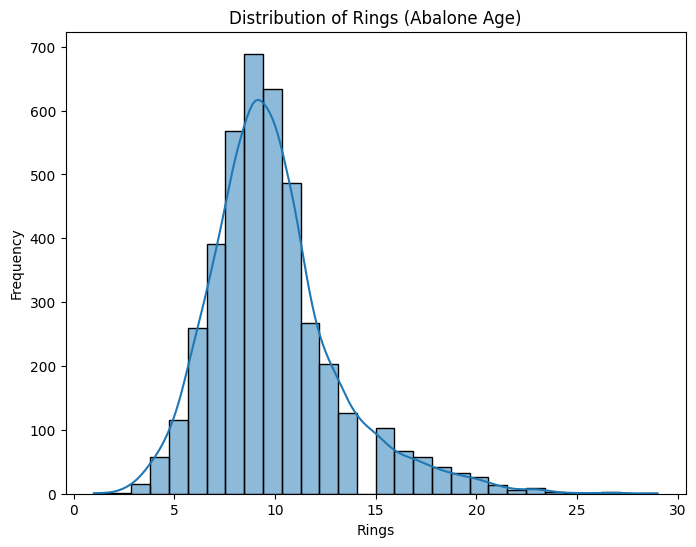

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Rings (Abalone Age)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

The approach provides insights on the distribution of abalone ages in the dataset by creating a histogram with a kernel density estimate to show the distribution of the 'Rings' variable.

Understanding the target variable's spread central tendency & the presence of outliers or particular patterns that might affect modeling or analytic choices is made easier by visualizing the distribution of the target variable.

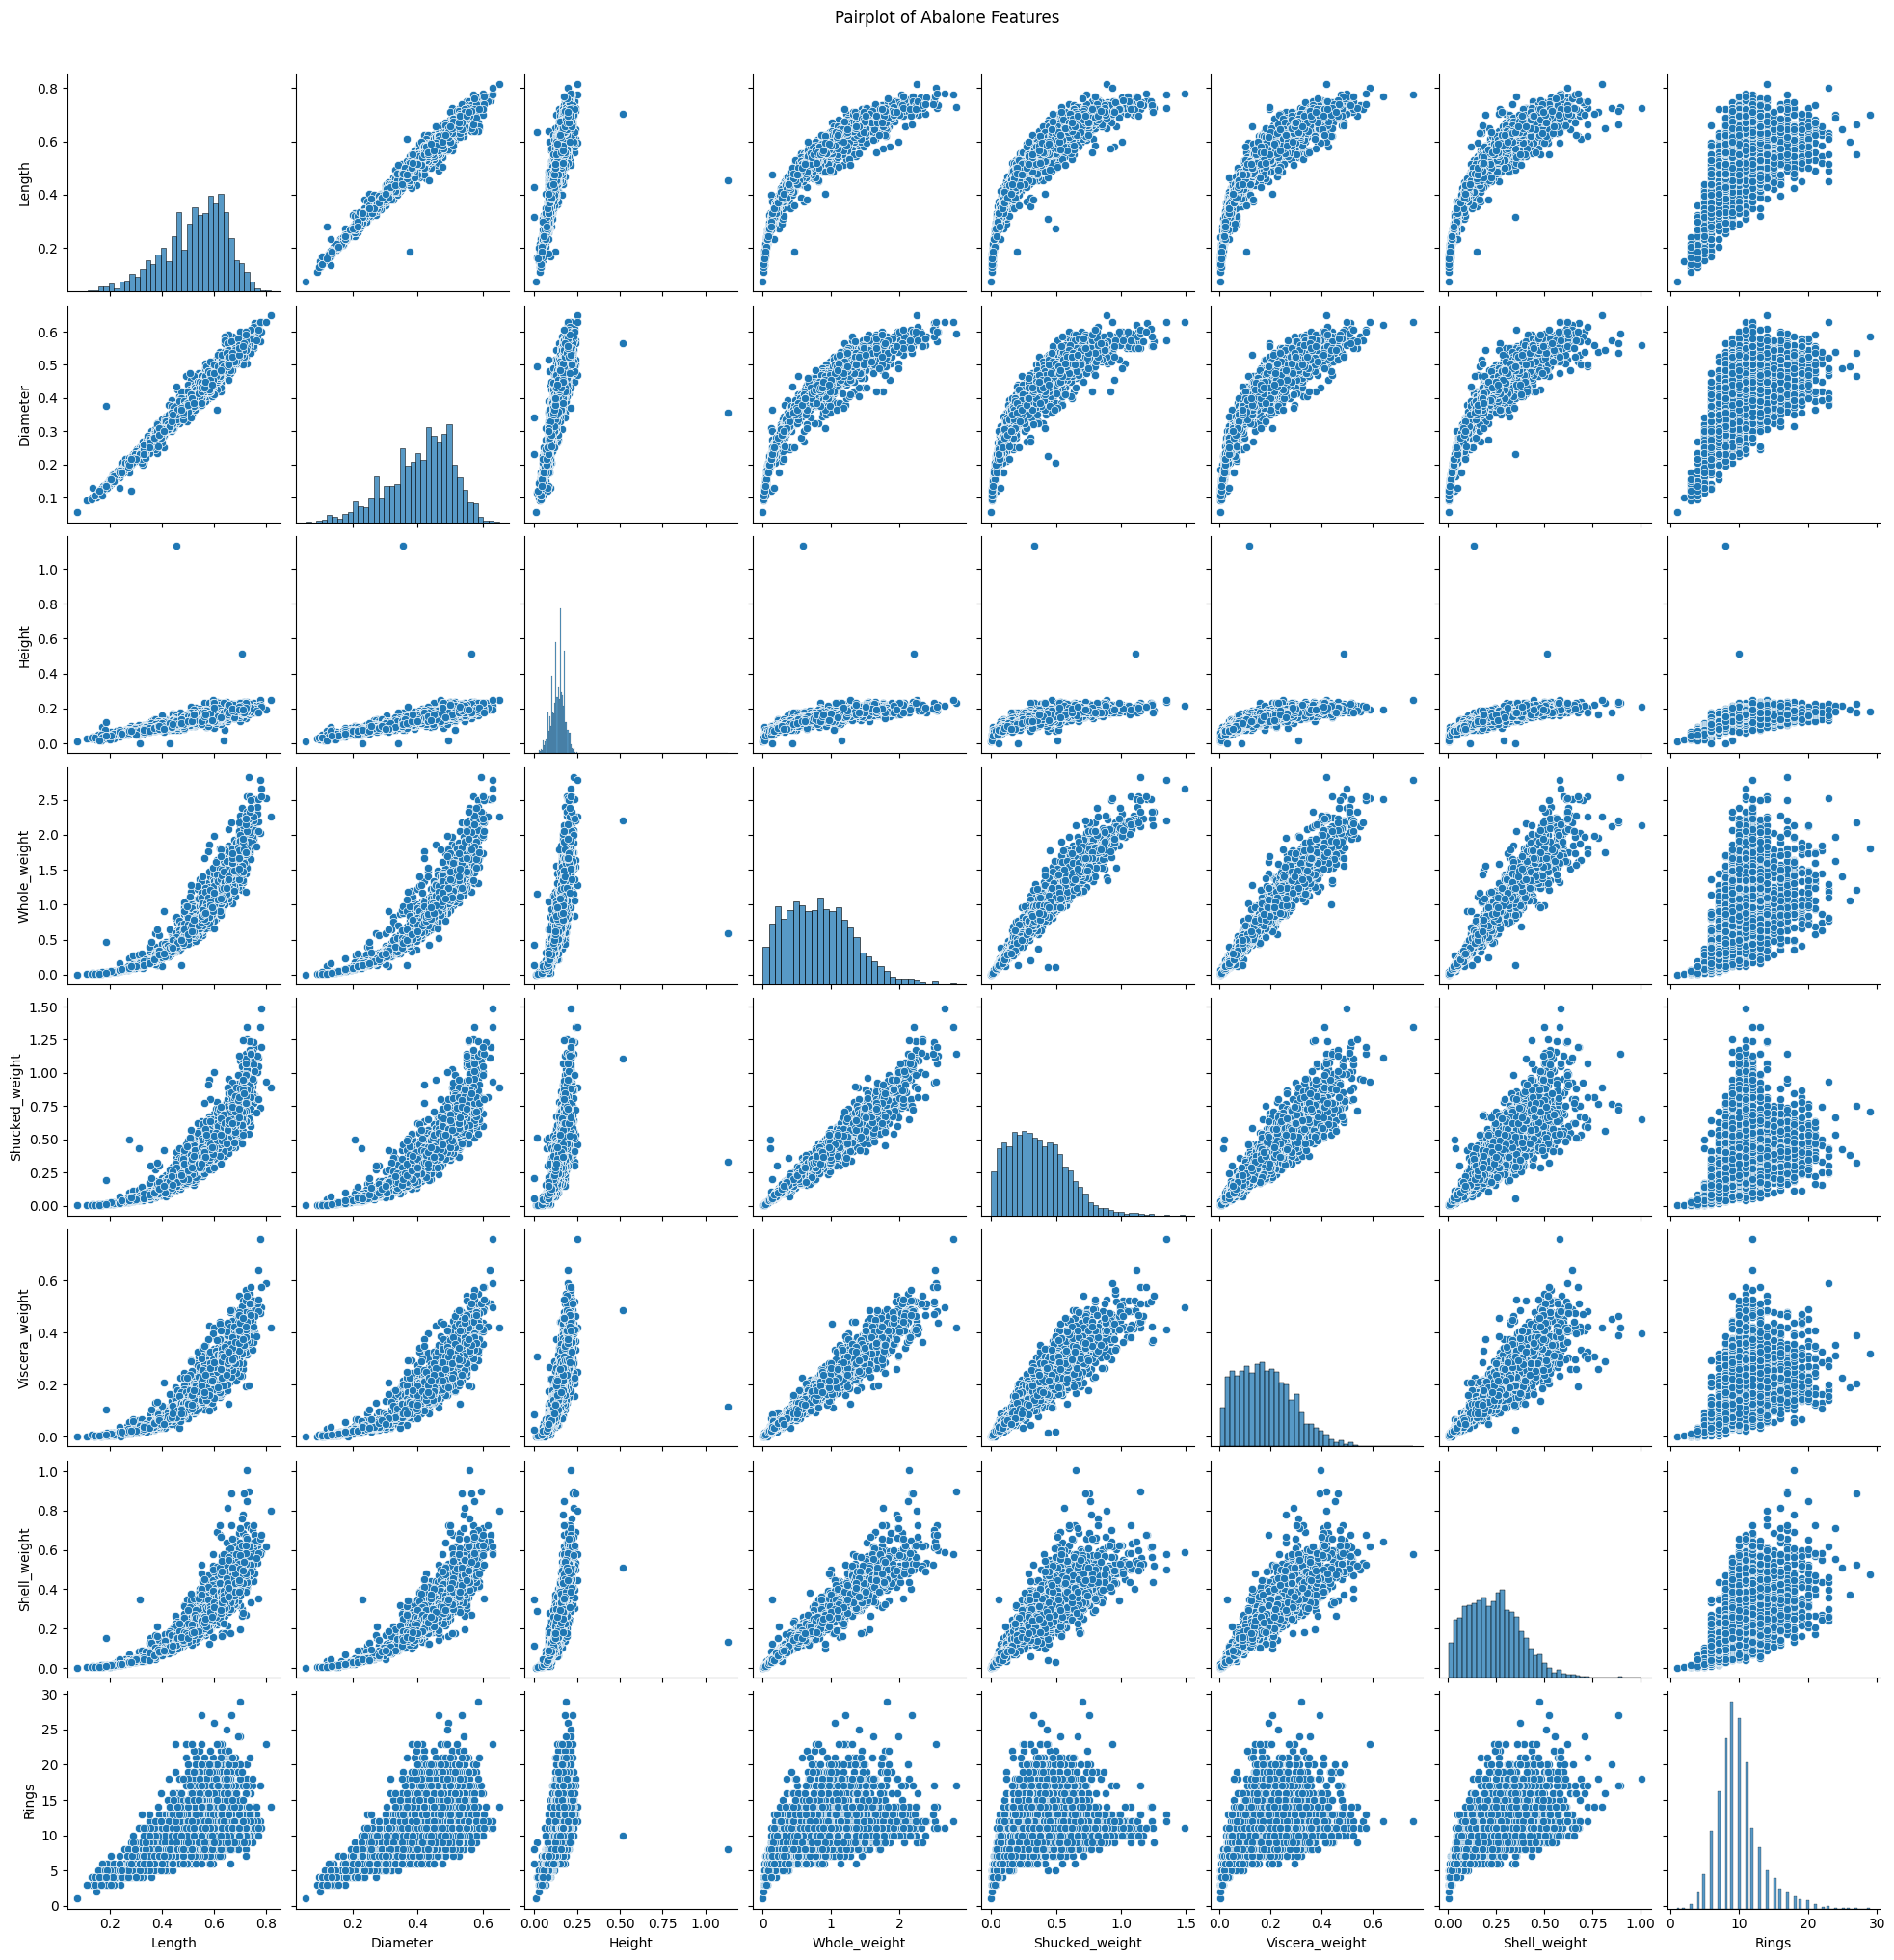

In [ ]:
# Create a pairplot to visualize relationships between numerical features
sns.pairplot(abalone_data[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']])
plt.suptitle("Pairplot of Abalone Features", y=1.02)
plt.show()

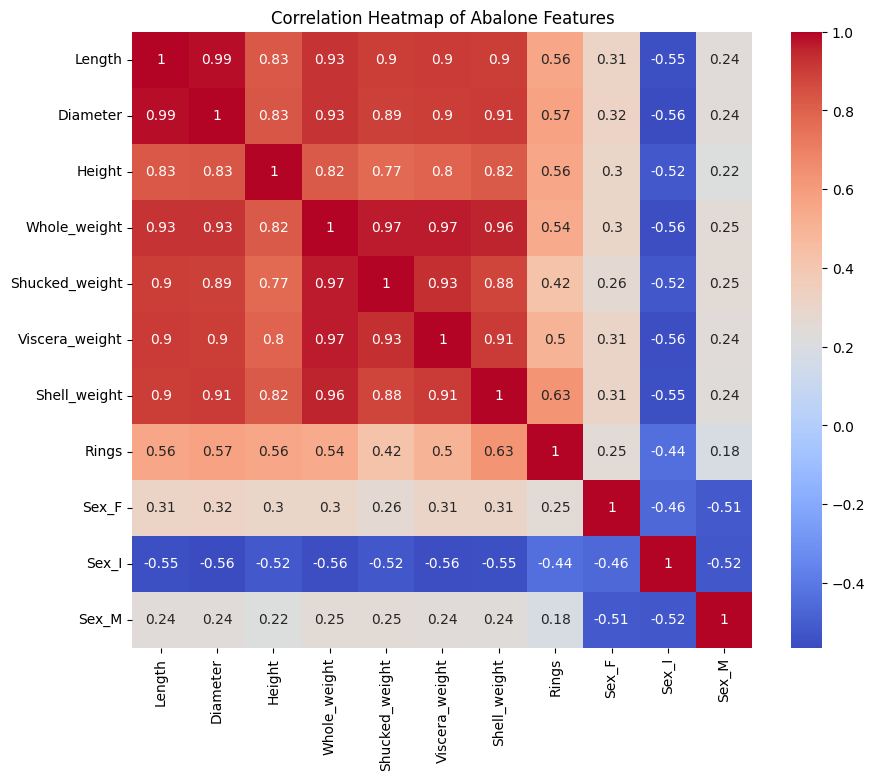

In [ ]:
# Visualize the correlation heatmap of features
plt.figure(figsize=(10, 8))
sns.heatmap(abalone_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Abalone Features')
plt.show()

A slanting line from the top left to bottom right in the correlation heatmap represents a perfect negative correlation between the two variables.

This indicates that as one variable increases, the other decreases in a perefectly linear manner.

The darker shade of red interprets the strength of correlation between variables.

**Regression techniques**

Linear Regression

Random Forest Regressor

**classification technique**

Decision Tree Regressor
______________________________________

Predictions using the three techniques

Evaluations metrics

Scatter plot of actual vs predicted values for visualization


In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions using Linear Regression
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluation Metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R-squared (R2): {lr_r2}")


Linear Regression Metrics:
Mean Absolute Error (MAE): 1.5931067816608369
Root Mean Squared Error (RMSE): 2.2116130871218367
R-squared (R2): 0.5481628137889262


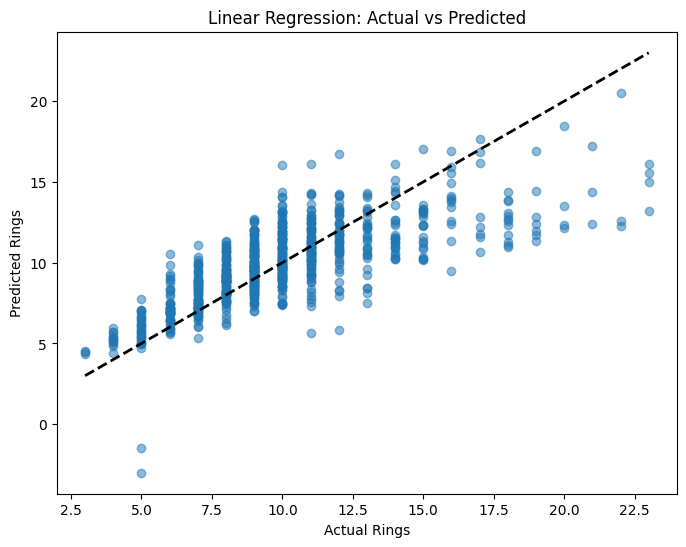

In [ ]:

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [ ]:
# Predictions using Decision Tree Regressor
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluation Metrics for Decision Tree Regressor
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Decision Tree Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {dt_mae}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse}")
print(f"R-squared (R2): {dt_r2}")


Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 2.0717703349282295
Root Mean Squared Error (RMSE): 3.018285580737839
R-squared (R2): 0.15844147055340319


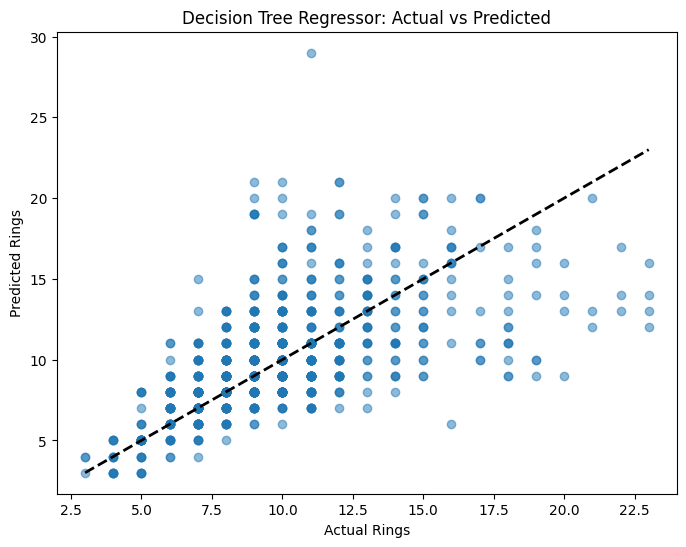

In [ ]:

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.show()


In [ ]:
# Predictions using Random Forest Regressor
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluation Metrics for Random Forest Regressor
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R-squared (R2): {rf_r2}")


Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 1.5854066985645934
Root Mean Squared Error (RMSE): 2.255938733516048
R-squared (R2): 0.5298696701532812


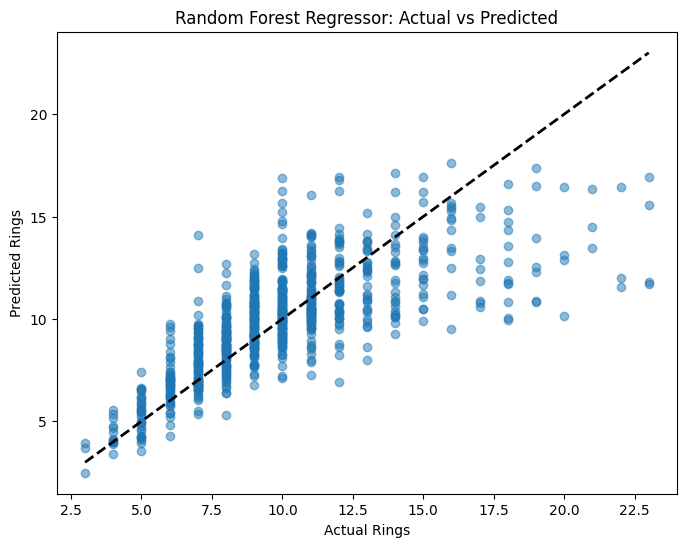

In [ ]:

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.show()


**Mean Absolute Error (MAE)**

With the lowest MAE (1.59), Linear Regression projections are, on average, 1.59 years older than the actual abalone ages.
The MAE of 1.59 for the Random Forest Regressor is thus equivalent to that of Linear Regression, indicating equal accuracy.
In comparison to both Linear Regression and Random Forest, the Decision Tree Regressor has a higher MAE of 2.07, suggesting bigger prediction errors.


**Root Mean Squared Error (RMSE)**

 The RMSE of 2.21 for linear regression indicates that the average forecast error is 2.21 years.
In comparison to Linear Regression, the Random Forest Regressor shows a somewhat higher RMSE of 2.26, indicating a somewhat bigger inaccuracy.
In comparison to both Linear Regression and Random Forest Regressor, the Decision Tree Regressor has the highest RMSE of
 3.02, indicating higher mistakes.


 **R-squared (R2)**


The model that can account for almost 55% of the variance in abalone age is Linear Regression, which has the greatest R-squared value (0.55).
The Random Forest Regressor has a strong R-squared value of 0.53, indicating that the model accounts for around 53% of the variability in abalone age.
In comparison to the other models, the Decision Tree Regressor has the lowest R-squared value (0.16), meaning that only about 16% of the variability in abalone age is explained by the model. This suggests that the model has less predictive capacity.



In comparison to the other models, Linear Regression has comparatively superior performance in terms of MAE, RMSE & R-squared.

Similar to linear regression, the Random Forest Regressor yields competitive results.


Out of the three models, the Decision Tree Regressor performs the least well.




###**Improvements to see if the model will perform better**


First approach is **gradient boosting** an esemble learning technique.
Justification for this approach is that it handles heterogeneous data types like the current dataset being used, improves predictive performance and also regularization.

In [ ]:

# Initialize and fit Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions using Gradient Boosting Regressor
gb_predictions = gb_model.predict(X_test_scaled)

# Evaluation Metrics for Gradient Boosting Regressor
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"R-squared (R2): {gb_r2}")


Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 1.5782051903929497
Root Mean Squared Error (RMSE): 2.2535677567681067
R-squared (R2): 0.5308573586127343


In terms of explanatory power and prediction accuracy, Gradient Boosting Regressor performs competitively, closely matching the outcomes of Linear Regression and Random Forest.
But out of the three, Gradient Boosting Regressor and Linear Regressor are the top 2.


Table of Gradient Boosting Regressor vs Linear Regressor for easier visualization.

In [ ]:
data = {
    'Model': ['Gradient Boost Regressor','Linear Regressor'],
    'MAE' : [1.58, 1.59],
    'RMSE' : [2.25, 2.21],
    'R2' : [0.53, 0.55]
}

df = pd.DataFrame(data)

df

,Model,MAE,RMSE,R2
0,Gradient Boost Regressor,1.58,2.25,0.53
1,Linear Regressor,1.59,2.21,0.55


Gradient Boosting Regressor leads in MAE

Linear Regressor leads in both RMSE and R2

**Grid Search**

Performimg a grid search over specified hyperparaemters for the gradient Boosting Regressor vs Linear Regressor

Goal

Model Optimization:

The goal of grid search is to identify the optimal configuration that maximizes a selected measure (such as accuracy, MAE, or RMSE) by methodically exploring combinations of hyperparameters.

Improving Model Performance:

The performance of a model is greatly affected by its hyperparameters. Grid search facilitates finding the best combination for more accurate forecasts.

In [ ]:

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to perform
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Perform Grid Search with defined parameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Retrieve best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


**Gradient Boosting Regressor with the grid search hyperparameters**

In [ ]:

# Create a new Gradient Boosting Regressor with the best hyperparameters
optimized_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42)

# Fit the model on the training data using the optimized parameters
optimized_gb_model.fit(X_train_scaled, y_train)

# Predict using the optimized Gradient Boosting Regressor
optimized_gb_predictions = optimized_gb_model.predict(X_test_scaled)

# Evaluate the performance of the optimized model
optimized_gb_mae = mean_absolute_error(y_test, optimized_gb_predictions)
optimized_gb_rmse = np.sqrt(mean_squared_error(y_test, optimized_gb_predictions))
optimized_gb_r2 = r2_score(y_test, optimized_gb_predictions)

print(f"Optimized Gradient Boosting Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {optimized_gb_mae}")
print(f"Root Mean Squared Error (RMSE): {optimized_gb_rmse}")
print(f"R-squared (R2): {optimized_gb_r2}")


Optimized Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 1.5602151264338915
Root Mean Squared Error (RMSE): 2.2497401261209378
R-squared (R2): 0.5324496602118391


**Linear Regressor with the grid search hyperparameters**

In [ ]:

# Create a Linear Regression model
lr_model_best_params = LinearRegression()

# Fit the model on the training data
lr_model_best_params.fit(X_train_scaled, y_train)

# Predict using the Linear Regression model
lr_predictions_best_params = lr_model_best_params.predict(X_test_scaled)

# Evaluate the performance of Linear Regression
lr_mae_best_params = mean_absolute_error(y_test, lr_predictions_best_params)
lr_rmse_best_params = np.sqrt(mean_squared_error(y_test, lr_predictions_best_params))
lr_r2_best_params = r2_score(y_test, lr_predictions_best_params)

print(f"Linear Regression Metrics with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {lr_mae_best_params}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse_best_params}")
print(f"R-squared (R2): {lr_r2_best_params}")


Linear Regression Metrics with Best Hyperparameters:
Mean Absolute Error (MAE): 1.5931067816608369
Root Mean Squared Error (RMSE): 2.2116130871218367
R-squared (R2): 0.5481628137889262


**Table**


Visualization of the two in comparison

In [ ]:
data = {
    'Model': ['New Gradient Boost Regressor','New Linear Regressor'],
    'MAE' : [1.56, 1.59],
    'RMSE' : [2.25, 2.21],
    'R2' : [0.53, 0.55]
}

df = pd.DataFrame(data)

df

,Model,MAE,RMSE,R2
0,New Gradient Boost Regressor,1.56,2.25,0.53
1,New Linear Regressor,1.59,2.21,0.55


Changes in metrics are marginal but the model has slightly reduced MAE, indication a slightly better accuaracy in abalone age prediction.
The other predictions stayed the same.

**Randomized search**





Randomized Search

Random Sampling

Within predetermined ranges, hyperparameter combinations are randomly sampled.

Efficiency

For large hyperparameter spaces, more efficient than grid search.
For models such as Gradient Boosting Regressor and Linear Regression, it is essential to optimize using a grid search or randomized search over predetermined hyperparameters. This is the reason it matters.

In [ ]:

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters distribution for Randomized Search
param_dist = {
    'n_estimators': randint(100, 500),  # Number of boosting stages to perform
    'learning_rate': uniform(0.01, 0.3),  # Learning rate shrinks the contribution of each tree
    'max_depth': randint(3, 8)  # Maximum depth of the individual trees
}

# Perform Randomized Search with defined parameters
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Retrieve best hyperparameters and best estimator
best_params_random = random_search.best_params_
best_estimator_random = random_search.best_estimator_

print("Best Hyperparameters (Randomized Search):", best_params_random)


Best Hyperparameters (Randomized Search): {'learning_rate': 0.010233629752304298, 'max_depth': 6, 'n_estimators': 376}


**Gradient Boosting Regressor with Randomized Search Hyperparameters**

In [ ]:

# Create a new Gradient Boosting Regressor with the best hyperparameters
optimized_gb_model_random = GradientBoostingRegressor(n_estimators=376, learning_rate=0.010233629752304298,
                                                      max_depth=6, random_state=42)

# Fit the model on the training data using the optimized parameters
optimized_gb_model_random.fit(X_train_scaled, y_train)

# Predict using the optimized Gradient Boosting Regressor
optimized_gb_predictions_random = optimized_gb_model_random.predict(X_test_scaled)

# Evaluate the performance of the optimized model
optimized_gb_mae_random = mean_absolute_error(y_test, optimized_gb_predictions_random)
optimized_gb_rmse_random = np.sqrt(mean_squared_error(y_test, optimized_gb_predictions_random))
optimized_gb_r2_random = r2_score(y_test, optimized_gb_predictions_random)

print(f"Optimized Gradient Boosting Regressor Metrics (Randomized Search):")
print(f"Mean Absolute Error (MAE): {optimized_gb_mae_random}")
print(f"Root Mean Squared Error (RMSE): {optimized_gb_rmse_random}")
print(f"R-squared (R2): {optimized_gb_r2_random}")


Optimized Gradient Boosting Regressor Metrics (Randomized Search):
Mean Absolute Error (MAE): 1.5505950258179657
Root Mean Squared Error (RMSE): 2.24168043034919
R-squared (R2): 0.5357936584452014


The results show slight enhancements in predictive accuracy, The reduced MAE and RMSE, along with the increased R squared value show better accuracy and model fit compared to the previous configurations.

**Linear Regression with Randomized Search Hyperparameters**

In [ ]:

# Create a Linear Regression model
lr_model_randomized_params = LinearRegression()

# Fit the model on the training data
lr_model_randomized_params.fit(X_train_scaled, y_train)

# Predict using the Linear Regression model
lr_predictions_randomized_params = lr_model_randomized_params.predict(X_test_scaled)

# Evaluate the performance of Linear Regression
lr_mae_randomized_params = mean_absolute_error(y_test, lr_predictions_randomized_params)
lr_rmse_randomized_params = np.sqrt(mean_squared_error(y_test, lr_predictions_randomized_params))
lr_r2_randomized_params = r2_score(y_test, lr_predictions_randomized_params)

print(f"Linear Regression Metrics with Randomized Search Hyperparameters:")
print(f"Mean Absolute Error (MAE): {lr_mae_randomized_params}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse_randomized_params}")
print(f"R-squared (R2): {lr_r2_randomized_params}")


Linear Regression Metrics with Randomized Search Hyperparameters:
Mean Absolute Error (MAE): 1.5931067816608369
Root Mean Squared Error (RMSE): 2.2116130871218367
R-squared (R2): 0.5481628137889262


In [ ]:
data = {
    'Model': ['New Gradient Boost Regressor','New Linear Regressor'],
    'MAE' : [1.55, 1.59],
    'RMSE' : [2.24, 2.21],
    'R2' : [0.54, 0.55]
}

df = pd.DataFrame(data)

df

,Model,MAE,RMSE,R2
0,New Gradient Boost Regressor,1.55,2.24,0.54
1,New Linear Regressor,1.59,2.21,0.55


Measures of Performance In brief


Mean Absolute Error (MAE) for Linear Regression: around 1.59 years

Approximate Root Mean Squared Error (RMSE): 2.21 years

R-squared (R2): Gradient Boosting of around 0.55 Regressor: 1.58 years is the mean absolute error (MAE).
RMS (Root Mean Squared Error): around 2.25 years
R-squared (R2): about 0.53 Boosting with Optimized Gradient Grid Search With Regressor Hyper-parameters:
MAE: Roughly 156 months
RMSE: Approximately 2.25 years
R2: With Randomized Search, around 0.53 Hyper-parameters:
RMSE: around 2.24 years; MAE: roughly 1.55 years
R2: Approximately 0.54


Conclusions


Comparing Models


Comparing Gradient Boosting with Linear Regression
Comparing Linear Regression to Gradient Boosting, the former exhibits somewhat better accuracy (lower MAE) and comparable R-squared values.


In comparison to Linear Regression, Gradient Boosting shows slightly lower MAE but significantly higher RMSE and R-squared.

Hyperparameter Adjustment:

Randomized vs. Grid Search:


By somewhat lowering MAE and RMSE in comparison to the original model, both strategies only slightly enhanced the performance of the Gradient Boosting model. It had a negligible effect on R-squared, though.
The performance of linear regression is invariant across both hyperparameter tweaking strategies.


Suggestions


Model Choice


To Achieve Greater Accuracy

In this case, Linear Regression could be a preferable option than Gradient Boosting because of its marginally higher accuracy metrics.


Additional Research:


Hyperparameter Tuning:

To possibly improve Gradient Boosting's prediction power even more, keep experimenting with various hyperparameters and methods.
Feature Engineering: Investigate new features or modifications that might enhance the performance of the model for both Gradient Boosting and Linear Regression.


In summary, both models perform very well, with Linear Regression showing somewhat superior accuracy in estimating abalone age based on physical attributes .

Decision-making processes in the abalone-related businesses may benefit from further investigation and enhancement of both models, especially Gradient Boosting, which has the potential to increase prediction accuracy.
